
PROJECT: Customer Segmentation

INTRODUCTION

Customer segmentation has to do with analysing a person/customer expenses based on his/her earning 

in this project, we will explore on the mall customer segmentation data set

### **Use Case**

Our use case for this project was the `Adult Income Dataset` sourced from Kagle (https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).



Aim/ Objectives:

This task is aimed at getting hands-on experience with KMeans and Hierarchical unsupervised machine learning techniques for analysis and prediction on customers based on their earnings and spendings.


Objectives:
    
1. To use python achieve customer segmentation using machine learning algorithm (KMeans Clustering).
2. To identify the target customers. 
3. Device a marketing strategy and apply it in in real world business.
4. To Enhance business growth through informed decisions.


# **Tools used**
**Data Analysis Tool:**
 Python (using libraries like Pandas, etc.)

 **Data Visualization Tool:**  Matplotlib, Seaborn, Scikit-Learn, Jupyter NotebookTool

**Machine Learning algorithms:**
  K-means clustering, Hierarchical clustering   


Steps

1.Data desription

2.Data Preparation

3.Exploratory Data Analysis (EDA)

4.Visualization

5. customer segmentation: Using K-means clustering and hierarchical clustering

6.Interpretation and Insights

7.Recommendations

8.Presentation# New Section

**Data Description**`

Our data has  row 200 and 5 columns. Each entry contains the following information.

CustomerID: The Id number of the customers

Gender: describe the sex of the customers

Age: Tells the age range of customers

Annual Income (k$): This descirbe the customers earning levels

Spending Score (1-100): Describe their spending strenght.


DATA PREPARATION

In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.shape

(200, 5)

- data cleaning

In [5]:
#changing the column names of the data 

column= dataset.columns.to_list()
column[0]="Customer_ID"
column[3] = 'Annual_Income_in_k$'
column[4]= 'Spending_Score_1_100'
column

['Customer_ID', 'Gender', 'Age', 'Annual_Income_in_k$', 'Spending_Score_1_100']

In [6]:
dataset.columns=column

In [7]:
dataset.head(2)

,Customer_ID,Gender,Age,Annual_Income_in_k$,Spending_Score_1_100
0,1,Male,19,15,39
1,2,Male,21,15,81


In [8]:
for i in dataset.columns:
 if dataset[i].dtype=="O":
     print (dataset[i].value_counts())

Female    112
Male       88
Name: Gender, dtype: int64


Observation

In counting the categorical data, it was found that the total number of male is 88 and that of female is 112

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer_ID           200 non-null    int64 
 1   Gender                200 non-null    object
 2   Age                   200 non-null    int64 
 3   Annual_Income_in_k$   200 non-null    int64 
 4   Spending_Score_1_100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
dataset.isnull().sum()

Customer_ID             0
Gender                  0
Age                     0
Annual_Income_in_k$     0
Spending_Score_1_100    0
dtype: int64

Observation

No null values

##### DATA EXPLORATION and VISUALIZATION

In [11]:
#getting the statistical values of the data set
dataset.describe()

,Customer_ID,Age,Annual_Income_in_k$,Spending_Score_1_100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
#Sorting the data
dataset.sort_values("Age", ascending = False)

,Customer_ID,Gender,Age,Annual_Income_in_k$,Spending_Score_1_100
70,71,Male,70,49,55
60,61,Male,70,46,56
57,58,Male,69,44,46
90,91,Female,68,59,55
67,68,Female,68,48,48
...,...,...,...,...,...
0,1,Male,19,15,39
33,34,Male,18,33,92
65,66,Male,18,48,59
91,92,Male,18,59,41


In [13]:
# dropping the customer id column
dataset.drop(columns='Customer_ID',inplace=True)


In [14]:
dataset['Age'].unique

<bound method Series.unique of 0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64>

In [15]:
dataset['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [16]:
#subsetting gender and age
col_to_subset =['Gender','Age']
dataset[col_to_subset]

,Gender,Age
0,Male,19
1,Male,21
2,Female,20
3,Female,23
4,Female,31
...,...,...
195,Female,35
196,Female,45
197,Male,32
198,Male,32


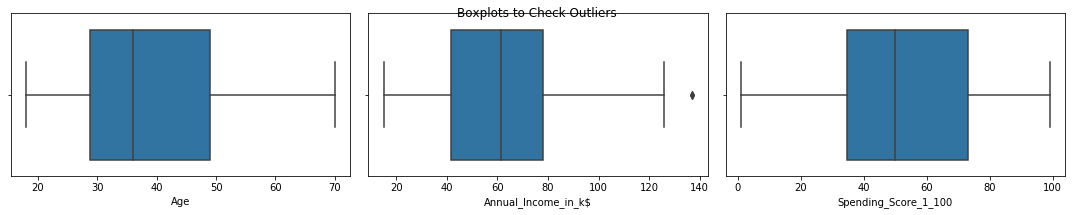

In [14]:
# Outliers for check
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cols = ['Age', 'Annual_Income_in_k$', 'Spending_Score_1_100']
for i in range(len(cols)):
    sns.boxplot(dataset[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()


Observation

there are no significant outliers

#### visualizing Categorical data

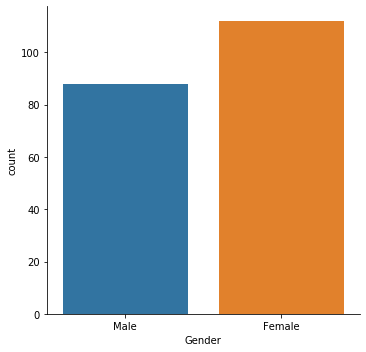

In [17]:
#working with barplot as age against gender
sns.catplot(data=dataset, x="Gender", kind="count")

#sns.barplot(xlabel='Age',ylabel='Gender',data=dataset)

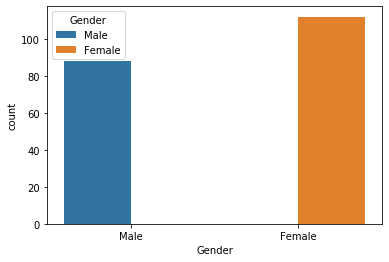

In [18]:
#countplot
sns.countplot(x='Gender', data=dataset, hue ='Gender')

<Figure size 1152x720 with 0 Axes>

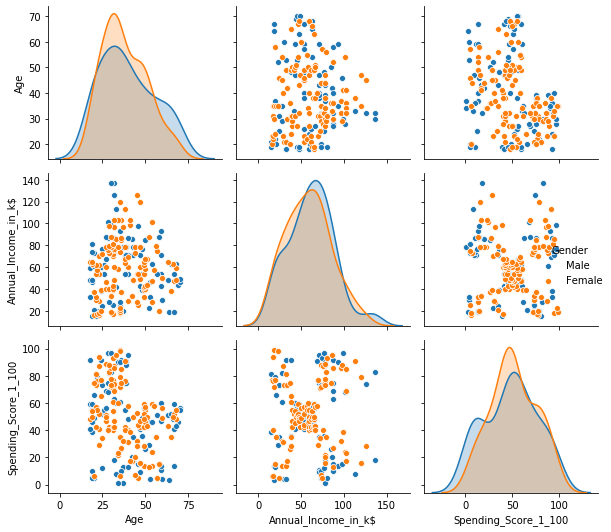

In [19]:
#plotting the relationships that exist between the data set features

plt.figure(1, figsize=(16,10))
sns.pairplot(data=dataset, hue='Gender')
plt.tight_layout()
plt.show()



In [20]:
#creating categories for the age column
def age_range(x):
    x = int(x)
    x = abs(x)
    if( 17 < x < 20 ):
        return "18-20"
    if( 20 < x < 30 ):
        return "21-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    if( 70 < x < 81 ):
        return "71-80"
    if( 80 < x < 91 ):
        return "81-90"
    else:
        return "Greater than 100"

dataset['age_range'] = dataset['Age'].apply(age_range)


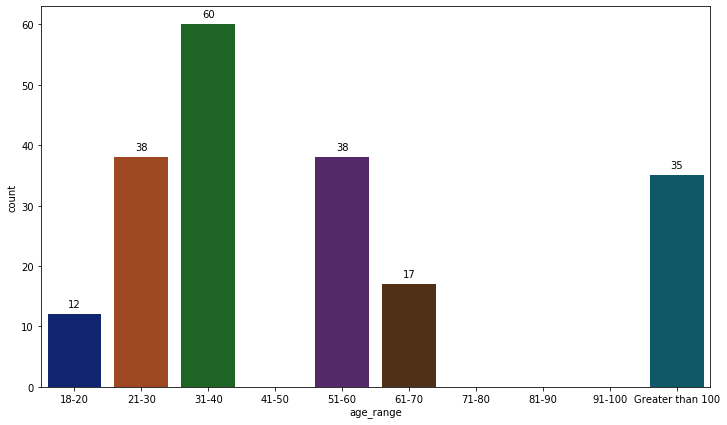

In [21]:
plt.figure(figsize=(12,7))
order_list = ['18-20', '21-30','31-40', '41-50', '51-60', '61-70', '71-80','81-90','91-100','Greater than 100']
bar = sns.countplot(dataset['age_range'], palette='dark', order = order_list)

for p in bar.patches:
  bar.annotate(format(p.get_height(), '.0f'), 
             (p.get_x() + p.get_width() / 2., 
              p.get_height()), ha = 'center', 
             va = 'center', xytext = (0, 10), 
             textcoords = 'offset points');

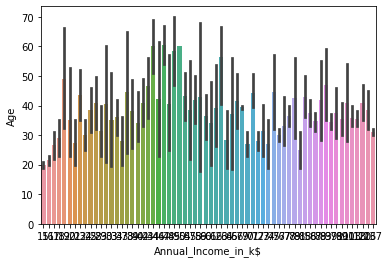

In [22]:
sns.barplot(x ='Annual_Income_in_k$', y='Age', data=dataset)

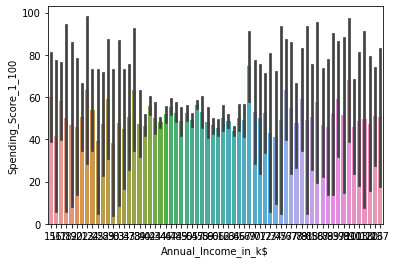

In [23]:
sns.barplot(x ='Annual_Income_in_k$', y='Spending_Score_1_100', data=dataset)

Quantitative Data

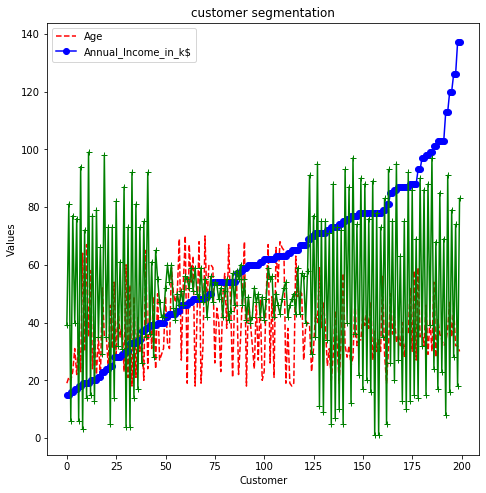

In [24]:
fig =plt.figure(figsize=(6,6))
axx =fig.add_axes([0, 0, 1, 1])
axx.plot(dataset['Age'], '--r')
axx.plot(dataset['Annual_Income_in_k$'], '-ob')
axx.plot(dataset['Spending_Score_1_100'], '-+g')
axx.legend(['Age', 'Annual_Income_in_k$', ])
axx.set_xlabel('Customer')
axx.set_ylabel('Values')
axx.set_title('customer segmentation')
#plt.savefig("person.png")
plt.show()

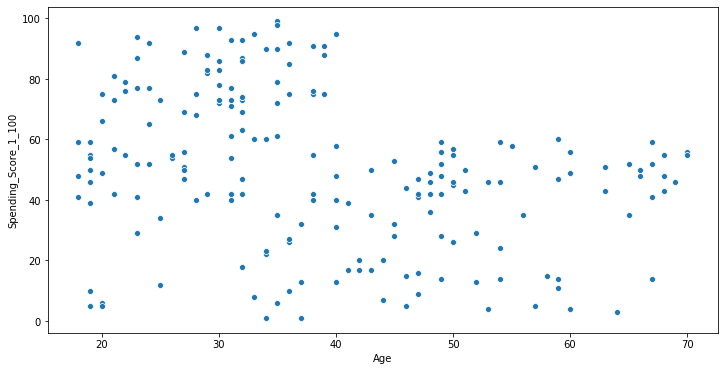

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x ='Age', y ='Spending_Score_1_100', data=dataset)

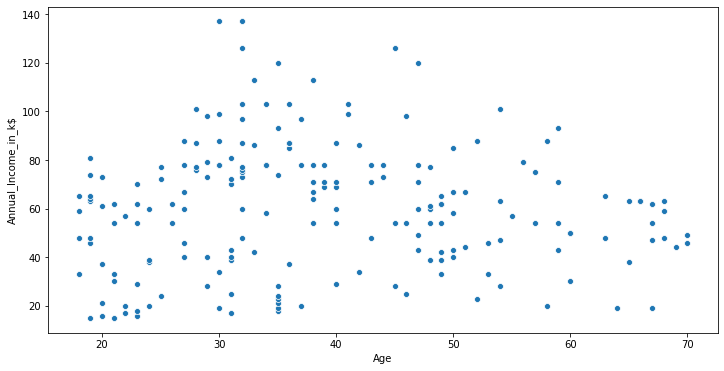

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(x ='Age', y ='Annual_Income_in_k$', data=dataset)

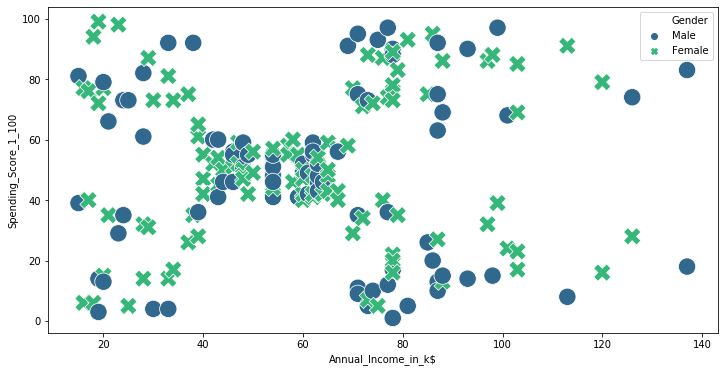

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x ='Annual_Income_in_k$', y ='Spending_Score_1_100', data=dataset, hue ='Gender', palette='viridis',style='Gender',  s=300)

In [28]:
#sns.histplot(x='Annual_Income_in_k$', data=dataset, hue ='Gender')

In [29]:
#sns.displot(x='Annual_Income_in_k$', data=dataset)

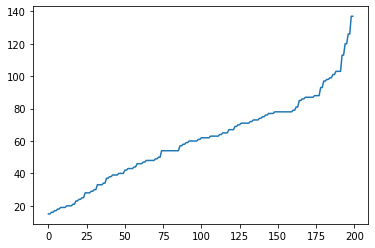

In [30]:
plt.plot(dataset['Annual_Income_in_k$'])

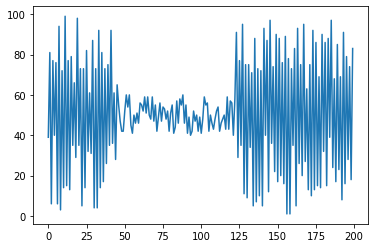

In [31]:
plt.plot(dataset['Spending_Score_1_100'])

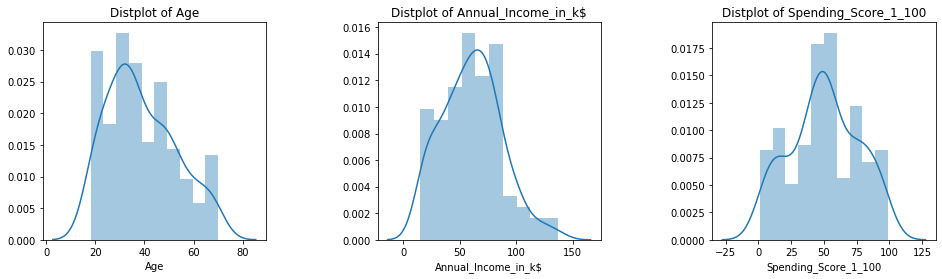

In [32]:
plt.figure(1, figsize=(16,4))
i = 0 
for j in ['Age', 'Annual_Income_in_k$', 'Spending_Score_1_100']:
    i += 1
    plt.subplot(1, 3, i)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(dataset[j] , bins=10)
    plt.title('Distplot of {}'.format(j))
plt.show()


### Performing customer segmentation using Using K-means clustering and hierarchical clustering


In [33]:
dataset.head(2)

,Gender,Age,Annual_Income_in_k$,Spending_Score_1_100,age_range
0,Male,19,15,39,18-20
1,Male,21,15,81,21-30


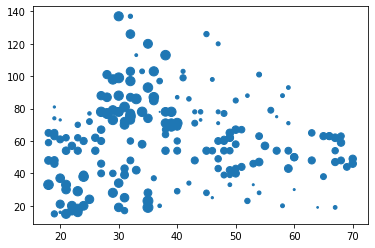

In [34]:
plt.scatter(dataset["Age"], dataset["Annual_Income_in_k$"], dataset['Spending_Score_1_100']);

In [36]:
#creating kmeans objects
km =KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [37]:
#to fit and predict the data frame excluding Gender because it is a string

y_predicted=km.fit_predict(dataset[['Age','Annual_Income_in_k$', 'Spending_Score_1_100']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

this ranked kmeans algorithm based on age and annual income and spending score computed the scatter plot based on the 3 clusters. 

In [38]:
dataset['Cluster']=y_predicted

dataset.head(2)

,Customer_ID,Gender,Age,Annual_Income_in_k$,Spending_Score_1_100,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2


In [39]:
km.cluster_centers_

array([[40.39473684, 87.        , 18.63157895],
       [32.69230769, 86.53846154, 82.12820513],
       [40.32520325, 44.15447154, 49.82926829]])

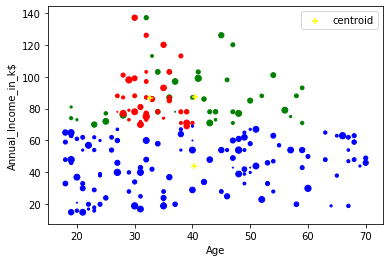

In [40]:
#seperate the 3 clusters into 3 different data frame

df1=dataset[dataset.Cluster==0]
df2=dataset[dataset.Cluster==1]
df3=dataset[dataset.Cluster==2]

plt.scatter(df1.Age, df1['Annual_Income_in_k$'],df1['Spending_Score_1_100'], color ='green')
plt.scatter(df2.Age, df2['Annual_Income_in_k$'], df1['Spending_Score_1_100'],color ='red')
plt.scatter(df3.Age, df3['Annual_Income_in_k$'],df1['Spending_Score_1_100'], color ='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color ='yellow', marker ='+', label='centroid')

plt.xlabel('Age')
plt.ylabel('Annual_Income_in_k$')
#plt.zlabel('Spending_Score_1_100')
plt.legend()

# i could not print z-label which is the spending score



In [41]:
dataset.head(2)

,Customer_ID,Gender,Age,Annual_Income_in_k$,Spending_Score_1_100,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2


In [44]:
#droping the added columns

#dataset.drop(columns='age_range',inplace=True)


In [45]:
#displaying the last 2 columns of the data set
x= dataset.iloc[:, -2:]
x.head(1)

,Spending_Score_1_100,Cluster
0,39,2


In [46]:
sse, km_scores = [], []
k_rng=range(2,11)
for k in k_rng:
    km = KMeans(n_clusters=k).fit(x) #creating a new model with clusters = k
    #km.fit(dataset[['Annual_Income_in_k$', 'Spending_Score_1_100']])
    sse.append(km.inertia_)
    
# inertia_ is used to get the sum of square error and append it inside the arrays
    km_scores.append(silhouette_score(x, km.labels_)) 

In [47]:
sse

[45977.62141917199,
 13976.822658995252,
 8947.225882091092,
 5223.730803120117,
 3512.2365387326813,
 2655.3714148788285,
 2036.529004060456,
 1611.3255286380286,
 1328.948702475061]

Observation

Initially, the sum of square error (sse) was very high and kept reducing 

In [53]:
km_scores

[0.31827029153316977,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5288104473798049,
 0.4531650787816753,
 0.4578565089921486,
 0.4416208208785718]

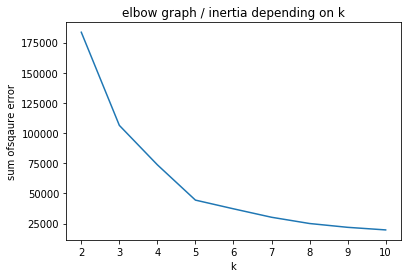

In [54]:
#plotting for the sum of square error against the range(k)
sns.lineplot(range(2, 11), sse)
plt.title('elbow graph / inertia depending on k')
plt.xlabel('k')
plt.ylabel('sum ofsqaure error')

plt.show()

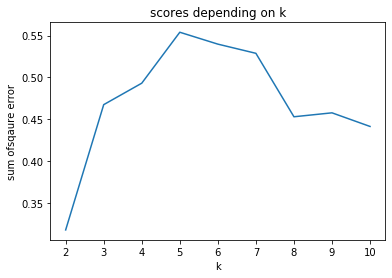

In [55]:
#plotting for the score
sns.lineplot(range(2, 11), km_scores)
plt.title('scores depending on k')
plt.xlabel('k')
plt.ylabel('sum ofsqaure error')
plt.show()


###  applying 3 features

In [48]:
dataset.head(2)

,Customer_ID,Gender,Age,Annual_Income_in_k$,Spending_Score_1_100,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2


In [49]:
x = dataset.iloc[:, -3:]
x.head(2)

,Annual_Income_in_k$,Spending_Score_1_100,Cluster
0,15,39,2
1,15,81,2


In [50]:
sse, km_scores = [], []
k_rng=range(2,11)
for k in k_rng:
    km = KMeans(n_clusters=k).fit(x) #creating a new model with clusters = k
    #km.fit(dataset[['Annual_Income_in_k$', 'Spending_Score_1_100']])
    sse.append(km.inertia_)
    
# inertia_ is used to get the sum of square error and append it inside the arrays
    km_scores.append(silhouette_score(x, km.labels_)) 

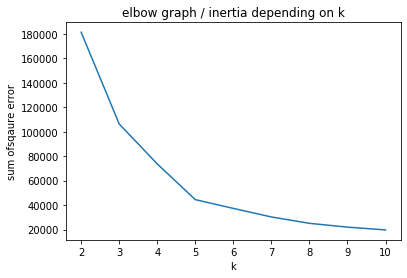

In [51]:

sns.lineplot(range(2, 11), sse)
plt.title('elbow graph / inertia depending on k')
plt.xlabel('k')
plt.ylabel('sum ofsqaure error')

plt.show()

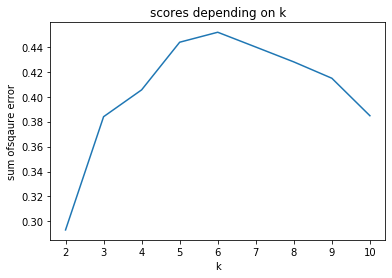

In [25]:
sns.lineplot(range(2, 11), km_scores)
plt.title('scores depending on k')
plt.xlabel('k')
plt.ylabel('sum ofsqaure error')
plt.show()


#### further creating kmean object



In [26]:
km = KMeans(n_clusters=5).fit(x)
km

KMeans(n_clusters=5)

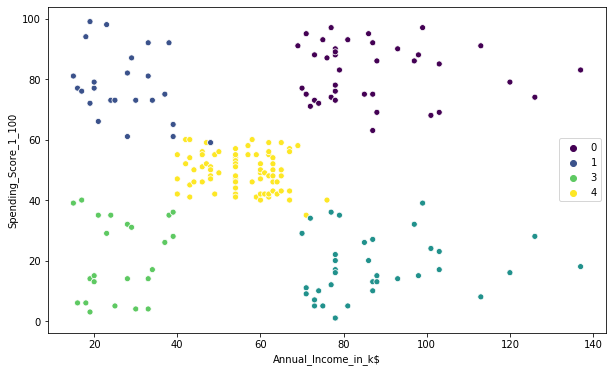

In [33]:
# K-Means visualization on 2 features (spending score and annual income)
plt.figure(figsize=(10, 6))
sns.scatterplot(x.iloc[:, 1], x.iloc[:, 2], hue=km.labels_, palette='viridis')
plt.show()


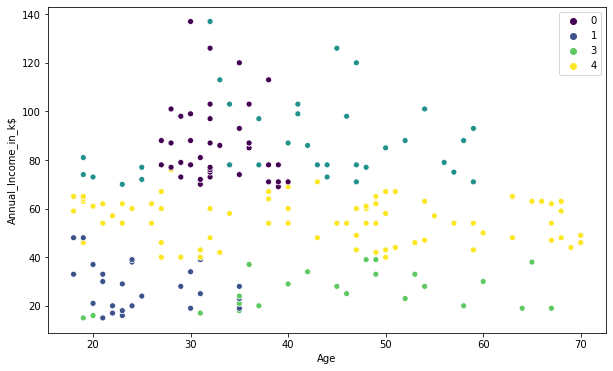

In [32]:
# K-Means visualization on annual income and age features
plt.figure(figsize=(10, 6))
sns.scatterplot(x.iloc[:, 0], x.iloc[:, 1], hue=km.labels_, palette='viridis')
plt.show()


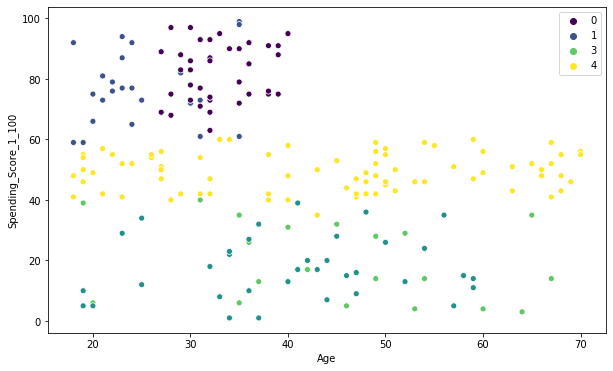

In [31]:
# K-Means visualization on the last pair of 2 features(spending score and ag)
plt.figure(figsize=(10, 6))
sns.scatterplot(x.iloc[:, 0], x.iloc[:, 2], hue=km.labels_, palette='viridis')
plt.show()


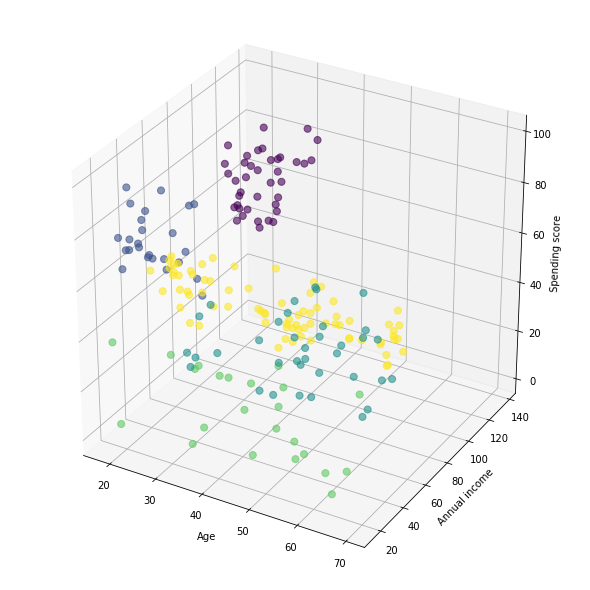

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

xs = x.iloc[:, 0]
ys = x.iloc[:, 1]
zs = x.iloc[:, 2]
ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_)

ax.set_xlabel('Age')
ax.set_ylabel('Annual income')
ax.set_zlabel('Spending score')

plt.show()


In [72]:
#to fit and predict the data frame with 5 clusters

kmeans = KMeans(n_clusters=5)
kmeans.fit(x)

# Labeling the data
dataset_kmeans = dataset.copy()
dataset_kmeans['Cluster'] = kmeans.labels_
dataset_kmeans.head()


,Customer_ID,Gender,Age,Annual_Income_in_k$,Spending_Score_1_100,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [70]:
dataset['Cluster'].value_counts()

2    123
1     39
0     38
Name: Cluster, dtype: int64

In [69]:
dataset.describe().iloc[[0, 1, 3, 7],:-1]

,Customer_ID,Age,Annual_Income_in_k$,Spending_Score_1_100
count,200.0,200.00,200.00,200.0
mean,100.5,38.85,60.56,50.2
min,1.0,18.00,15.00,1.0
max,200.0,70.00,137.00,99.0


### PREDICTION USING HIERARCHICAL CLUSTERING

In [75]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram


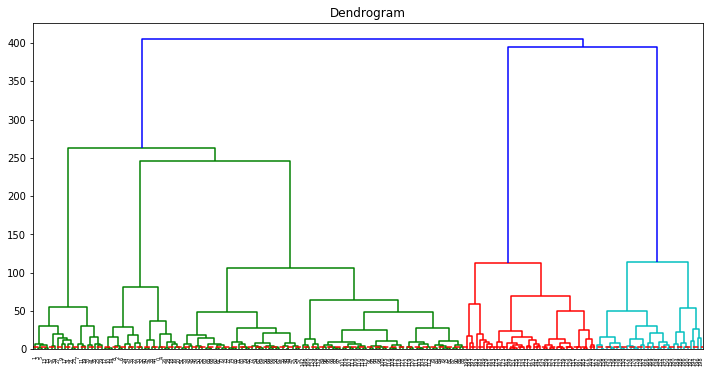

In [76]:
# Plotting dendrogram
mergings = linkage(x, method="ward")
plt.figure(figsize=(12, 6))
dendrogram(mergings)
plt.axhline(y=3, color='r', linestyle='--')
plt.title('Dendrogram')
plt.show()


In [79]:
# Agglomerative clustering with 5 clusters
aggclust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
aggclust.fit(x)

# Labeling the data
dataset_agg = dataset.copy()
dataset_agg['Cluster'] = aggclust.labels_
dataset_agg.head()


,Customer_ID,Gender,Age,Annual_Income_in_k$,Spending_Score_1_100,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


### 6.Interpretation and Insights
Observation

In both the Kmeans and Hierarchical clusterings,

Cluster 0. Customers with average annual income and average annual spend

Cluster 1. Customers with high annual income and high annual spend

Cluster 2. Customers with low annual income and low annual spend

Cluster 3. Customers with high annual income but low annual spend

Cluster 4. Customers low annual income but high annual spend

with this understanding, organizations or companies should give more attention to the high income earners who spend less, a market basket strategy can as well be applied to fascilitate their decision on purchase.
Furthermore, they should device means to maintain their higher spenders (customers) satisfaction to avoid losing them.



### Recommendation

I would recommend that a market basket strategy be applied to enhance customers decision on what to buy, because sometimes customers may find it difficult to make choices of what to purchase. 